In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import joblib

In [2]:
df=pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### check the data points available in quality column and acc set a threshold to classify if good wine or not

In [3]:
set(df['quality'])

{3, 4, 5, 6, 7, 8}

In [4]:
df['classify']=1

In [5]:
for i in range(len(df)):
    if df['quality'][i]<7:
        df['classify'][i]=0
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classify
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [6]:
set(df[df['classify']==1]['quality'])

{7, 8}

In [7]:
set(df[df['classify']==0]['quality'])

{3, 4, 5, 6}

In [8]:
df['classify'].value_counts()

0    1382
1     217
Name: classify, dtype: int64

In [9]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (1599, 13)


In [10]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: False


In [11]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
classify                  int64
dtype: object

### almost all columns are float datatype except for quality and classify which are int

In [12]:
print('Number of not good wine are:',df['classify'].value_counts()[0])
print('Number of good wine are:',df['classify'].value_counts()[1])
print('Unbalanced dataset' if df['classify'].value_counts()[0]!=df['classify'].value_counts()[1] else 'Balanced dataset')

Number of not good wine are: 1382
Number of good wine are: 217
Unbalanced dataset


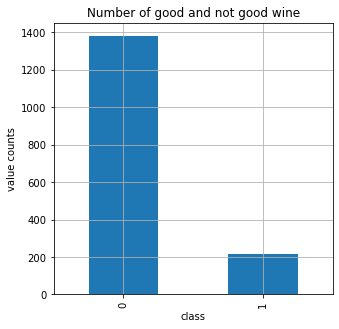

In [13]:
plt.figure(figsize=[5,5])
df['classify'].value_counts().plot(kind='bar')
plt.xlabel("class")
plt.ylabel('value counts')
plt.title('Number of good and not good wine')
plt.grid()

### balance back the dataset

In [14]:
sm=SMOTE()
x,y=sm.fit_resample(df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']], df[['classify']])

In [15]:
y.value_counts()

classify
0           1382
1           1382
dtype: int64

In [16]:
dff=x.copy()
dff

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...
2759,9.498668,0.308267,0.459600,3.395339,0.071920,42.853325,69.760011,0.998092,3.357200,0.856933,10.752002
2760,8.704400,0.516206,0.220377,2.001257,0.071709,3.670857,16.335429,0.996411,3.336143,0.829434,10.533543
2761,8.400865,0.250187,0.390029,2.000577,0.041089,4.002883,10.000000,0.993863,3.269798,0.709813,12.499135
2762,7.384886,0.347583,0.384285,1.732417,0.079159,29.593387,104.013740,0.995481,3.381099,0.706071,11.074453


In [17]:
dff['classify']=y
dff

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,classify
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,0
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,0
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,0
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2759,9.498668,0.308267,0.459600,3.395339,0.071920,42.853325,69.760011,0.998092,3.357200,0.856933,10.752002,1
2760,8.704400,0.516206,0.220377,2.001257,0.071709,3.670857,16.335429,0.996411,3.336143,0.829434,10.533543,1
2761,8.400865,0.250187,0.390029,2.000577,0.041089,4.002883,10.000000,0.993863,3.269798,0.709813,12.499135,1
2762,7.384886,0.347583,0.384285,1.732417,0.079159,29.593387,104.013740,0.995481,3.381099,0.706071,11.074453,1


### check the correlation in new dataset to consider relevant columns

In [18]:
dff.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,classify
fixed acidity,1.000000,-0.286943,0.717617,0.159821,0.118941,-0.177613,-0.186019,0.673702,-0.728335,0.201113,-0.114944,0.161311
volatile acidity,-0.286943,1.000000,-0.571810,0.024043,0.128332,0.049749,0.163983,0.095804,0.269118,-0.328562,-0.291298,-0.431968
citric acid,0.717617,-0.571810,1.000000,0.188998,0.152305,-0.101909,-0.076804,0.349824,-0.606554,0.325081,0.153158,0.313783
residual sugar,0.159821,0.024043,0.188998,1.000000,0.073923,0.120262,0.174077,0.361894,-0.111052,-0.013970,0.038150,0.033113
chlorides,0.118941,0.128332,0.152305,0.073923,1.000000,-0.005221,0.028925,0.269741,-0.240807,0.247298,-0.278761,-0.200059
free sulfur dioxide,-0.177613,0.049749,-0.101909,0.120262,-0.005221,1.000000,0.679982,-0.020168,0.110737,0.022856,-0.099893,-0.113597
total sulfur dioxide,-0.186019,0.163983,-0.076804,0.174077,0.028925,0.679982,1.000000,0.025712,0.039744,-0.019878,-0.188255,-0.235723
density,0.673702,0.095804,0.349824,0.361894,0.269741,-0.020168,0.025712,1.000000,-0.379707,0.095170,-0.572761,-0.232550
pH,-0.728335,0.269118,-0.606554,-0.111052,-0.240807,0.110737,0.039744,-0.379707,1.000000,-0.159721,0.203494,-0.080422
sulphates,0.201113,-0.328562,0.325081,-0.013970,0.247298,0.022856,-0.019878,0.095170,-0.159721,1.000000,0.181814,0.327410


<AxesSubplot:>

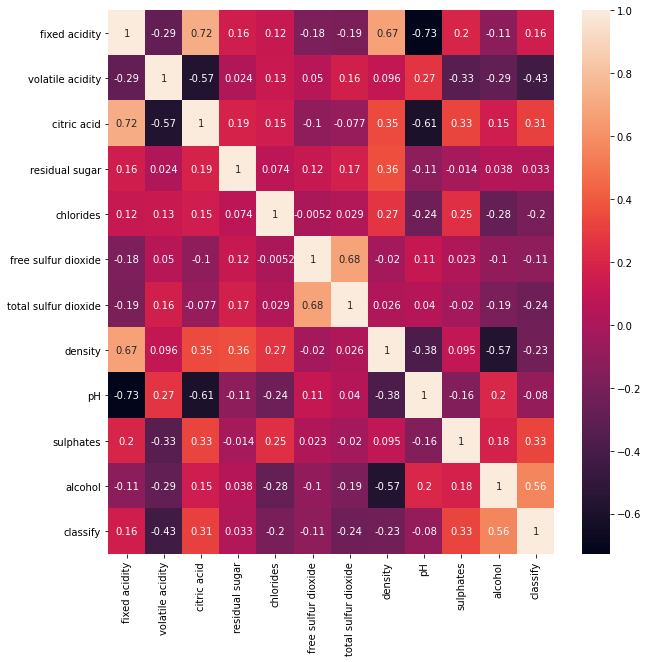

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(dff.corr(),annot=True,ax=ax)

In [20]:
dff.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,classify
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.00000
mean,8.525335,0.473912,0.314471,2.554222,0.081669,15.011115,40.996406,0.996398,3.302806,0.694806,10.891110,0.50000
std,1.788818,0.169281,0.191454,1.271691,0.038056,10.223026,30.929195,0.001984,0.146888,0.152901,1.134528,0.50009
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.00000
25%,7.200000,0.346770,0.150000,1.930435,0.066621,6.889969,19.000000,0.995124,3.203898,0.590000,9.900000,0.00000
50%,8.200000,0.440000,0.330000,2.200000,0.076000,12.201101,31.962717,0.996360,3.300000,0.680000,10.900000,0.50000
75%,9.600000,0.588811,0.460000,2.600000,0.087000,20.000000,52.000000,0.997600,3.390000,0.778443,11.789343,1.00000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.00000


### using df.corr() i was unable to find relevant columns lets try finding using bar graph

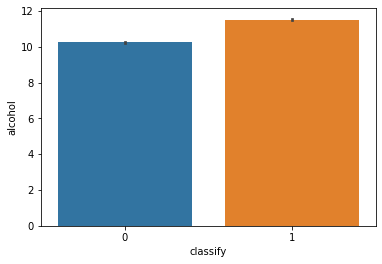

In [21]:
sn.barplot(x="classify",y="alcohol",data=dff)
plt.show()

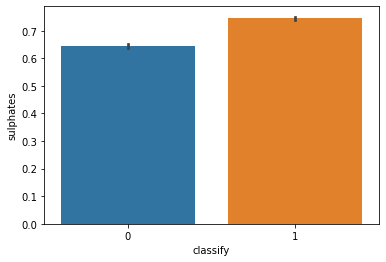

In [22]:
sn.barplot(x="classify",y="sulphates",data=dff)
plt.show()

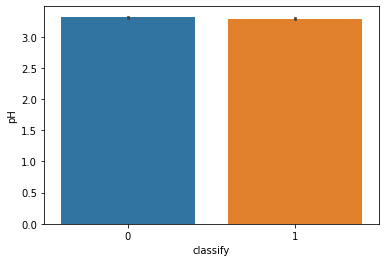

In [23]:
sn.barplot(x="classify",y="pH",data=dff)
plt.show()

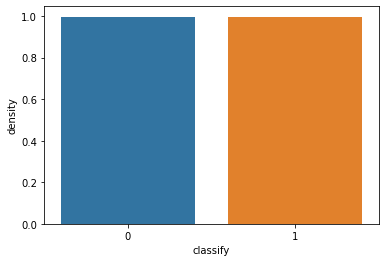

In [24]:
sn.barplot(x="classify",y="density",data=dff)
plt.show()

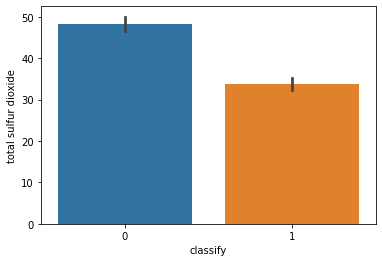

In [25]:
sn.barplot(x="classify",y="total sulfur dioxide",data=dff)
plt.show()

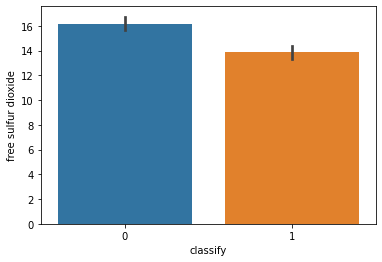

In [26]:
sn.barplot(x="classify",y="free sulfur dioxide",data=dff)
plt.show()

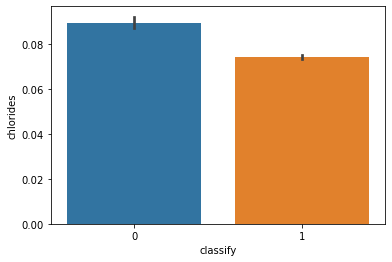

In [27]:
sn.barplot(x="classify",y="chlorides",data=dff)
plt.show()

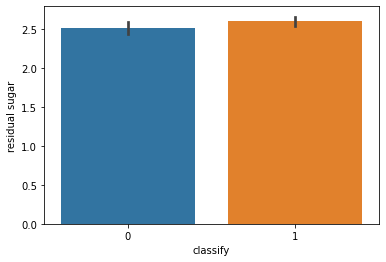

In [28]:
sn.barplot(x="classify",y="residual sugar",data=dff)
plt.show()

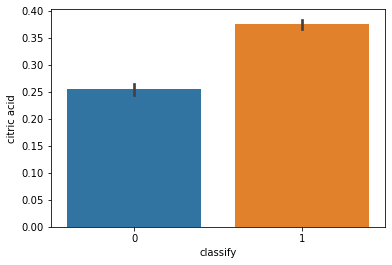

In [29]:
sn.barplot(x="classify",y="citric acid",data=dff)
plt.show()

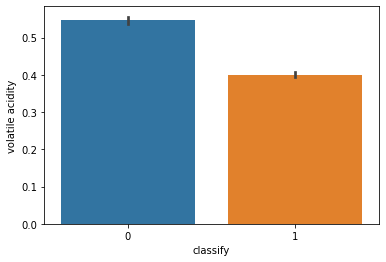

In [30]:
sn.barplot(x="classify",y="volatile acidity",data=dff)
plt.show()

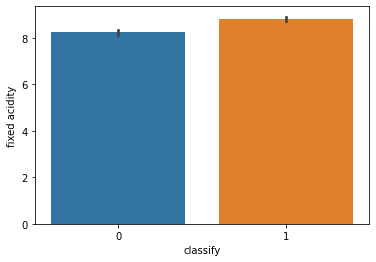

In [31]:
sn.barplot(x="classify",y="fixed acidity",data=dff)
plt.show()

### PH and density columns values data are not able to distinguish between classes hence to be dropped

<AxesSubplot:>

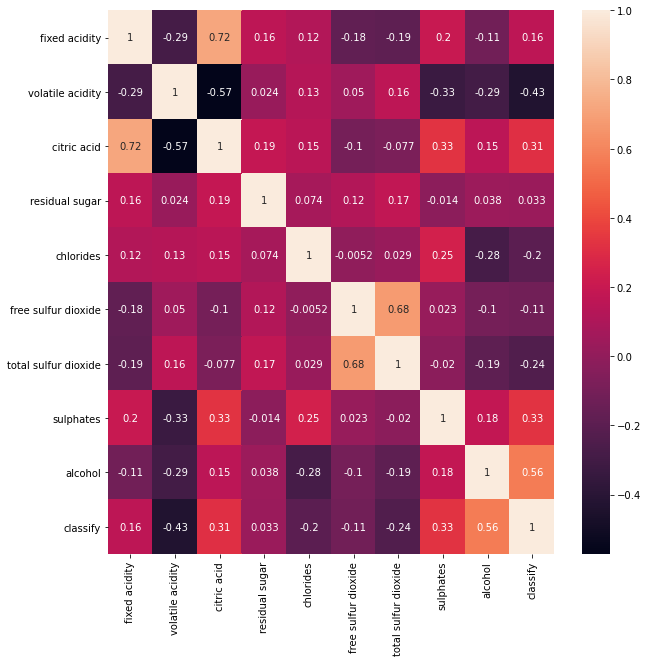

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(dff.drop(['pH','density'],axis=1).corr(),annot=True,ax=ax)

In [33]:
dff=dff.drop(['pH','density'],axis=1)
dff

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,classify
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.560000,9.400000,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.680000,9.800000,0
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.650000,9.800000,0
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.580000,9.800000,0
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.560000,9.400000,0
...,...,...,...,...,...,...,...,...,...,...
2759,9.498668,0.308267,0.459600,3.395339,0.071920,42.853325,69.760011,0.856933,10.752002,1
2760,8.704400,0.516206,0.220377,2.001257,0.071709,3.670857,16.335429,0.829434,10.533543,1
2761,8.400865,0.250187,0.390029,2.000577,0.041089,4.002883,10.000000,0.709813,12.499135,1
2762,7.384886,0.347583,0.384285,1.732417,0.079159,29.593387,104.013740,0.706071,11.074453,1


In [34]:
dff.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,classify
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.00000
mean,8.525335,0.473912,0.314471,2.554222,0.081669,15.011115,40.996406,0.694806,10.891110,0.50000
std,1.788818,0.169281,0.191454,1.271691,0.038056,10.223026,30.929195,0.152901,1.134528,0.50009
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.330000,8.400000,0.00000
25%,7.200000,0.346770,0.150000,1.930435,0.066621,6.889969,19.000000,0.590000,9.900000,0.00000
50%,8.200000,0.440000,0.330000,2.200000,0.076000,12.201101,31.962717,0.680000,10.900000,0.50000
75%,9.600000,0.588811,0.460000,2.600000,0.087000,20.000000,52.000000,0.778443,11.789343,1.00000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,2.000000,14.900000,1.00000


### check for outliers

<AxesSubplot:xlabel='fixed acidity'>

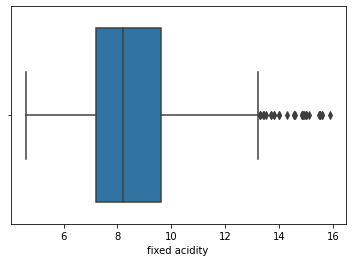

In [35]:
sn.boxplot(dff['fixed acidity'])

<AxesSubplot:xlabel='volatile acidity'>

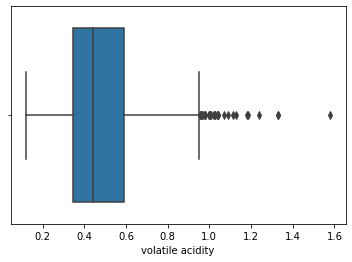

In [36]:
sn.boxplot(dff['volatile acidity'])

<AxesSubplot:xlabel='citric acid'>

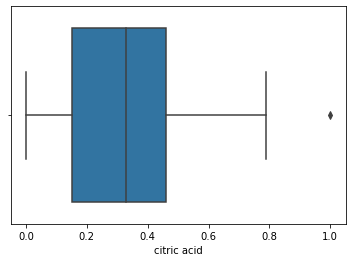

In [37]:
sn.boxplot(dff['citric acid'])

<AxesSubplot:xlabel='residual sugar'>

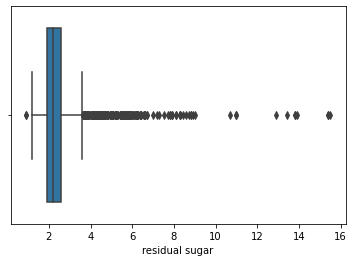

In [38]:
sn.boxplot(dff['residual sugar'])

<AxesSubplot:xlabel='chlorides'>

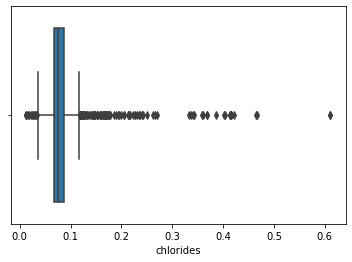

In [39]:
sn.boxplot(dff['chlorides'])

<AxesSubplot:xlabel='free sulfur dioxide'>

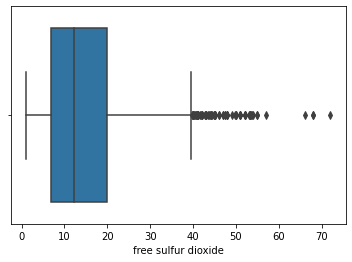

In [40]:
sn.boxplot(dff['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide'>

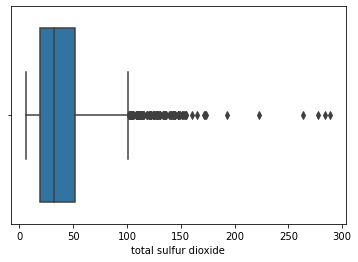

In [41]:
sn.boxplot(dff['total sulfur dioxide'])

<AxesSubplot:xlabel='sulphates'>

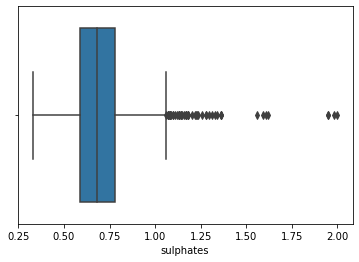

In [42]:
sn.boxplot(dff['sulphates'])

<AxesSubplot:xlabel='alcohol'>

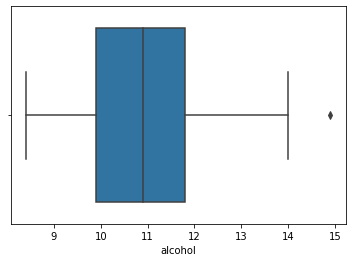

In [43]:
sn.boxplot(dff['alcohol'])

### remove outlier using zscaler

In [44]:
z_scr=zscore(dff)
print(dff.shape)
dff_new=dff.loc[(abs(z_scr)<3).all(axis=1)]
print(dff_new.shape)

(2764, 10)
(2554, 10)


In [45]:
((2764-2564)/2764)*100

7.23589001447178

### outliers  removed as there is less than 10% data loss. now cross check

<AxesSubplot:xlabel='fixed acidity'>

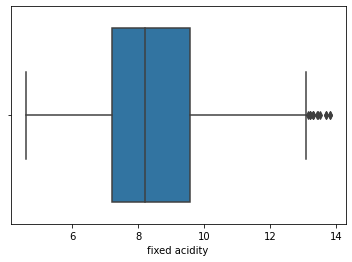

In [46]:
sn.boxplot(dff_new['fixed acidity'])

### nope still outlier exists use iqr to try to remove

In [47]:
Q1 = dff.quantile(q=.25)
Q3 = dff.quantile(q=.75)
IQR = dff.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = dff[~((dff < (Q1-1.5*IQR)) | (dff > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(2115, 10)

In [48]:
((2764-2129)/2764)*100

22.9739507959479

### cant use iqr, as data loss more than 10%, use zscore output data as it was able to remove some outlier

In [49]:
z_scr=zscore(dff_new)
print(dff_new.shape)
dff_newy=dff_new.loc[(abs(z_scr)<3).all(axis=1)]
print(dff_newy.shape)

(2554, 10)
(2353, 10)


In [50]:
((2764-2362)/2764)*100

14.544138929088277

### further applying of zscore creates a data loss of more 10% hence use dff_new

In [51]:
dff_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,classify
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.560000,9.400000,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.680000,9.800000,0
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.650000,9.800000,0
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.580000,9.800000,0
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.560000,9.400000,0
...,...,...,...,...,...,...,...,...,...,...
2759,9.498668,0.308267,0.459600,3.395339,0.071920,42.853325,69.760011,0.856933,10.752002,1
2760,8.704400,0.516206,0.220377,2.001257,0.071709,3.670857,16.335429,0.829434,10.533543,1
2761,8.400865,0.250187,0.390029,2.000577,0.041089,4.002883,10.000000,0.709813,12.499135,1
2762,7.384886,0.347583,0.384285,1.732417,0.079159,29.593387,104.013740,0.706071,11.074453,1


### check if dataset still balanced or not

In [52]:
dff_new['classify'].value_counts()

1    1321
0    1233
Name: classify, dtype: int64

### check all the distribution plot

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

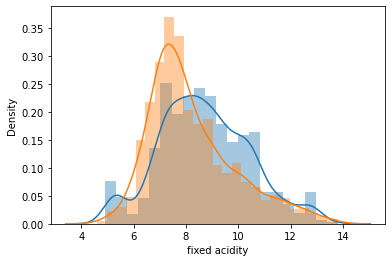

In [53]:
good=dff_new[dff_new['classify']==1]
bad=dff_new[dff_new['classify']==0]
sn.distplot(good['fixed acidity'],label='1')
sn.distplot(bad['fixed acidity'],label='0')

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

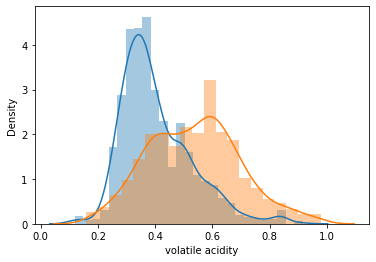

In [54]:
good=dff_new[dff_new['classify']==1]
bad=dff_new[dff_new['classify']==0]
sn.distplot(good['volatile acidity'],label='1')
sn.distplot(bad['volatile acidity'],label='0')

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

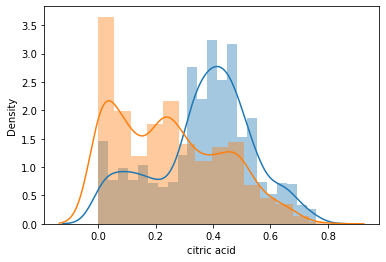

In [55]:
good=dff_new[dff_new['classify']==1]
bad=dff_new[dff_new['classify']==0]
sn.distplot(good['citric acid'],label='1')
sn.distplot(bad['citric acid'],label='0')

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

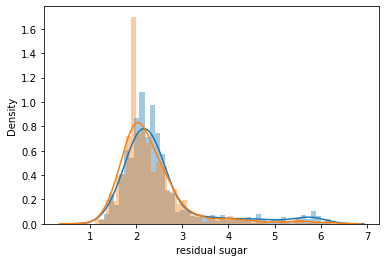

In [56]:
good=dff_new[dff_new['classify']==1]
bad=dff_new[dff_new['classify']==0]
sn.distplot(good['residual sugar'],label='1')
sn.distplot(bad['residual sugar'],label='0')

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

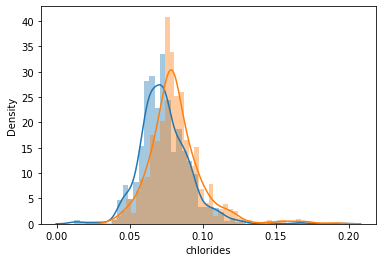

In [57]:
good=dff_new[dff_new['classify']==1]
bad=dff_new[dff_new['classify']==0]
sn.distplot(good['chlorides'],label='1')
sn.distplot(bad['chlorides'],label='0')

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

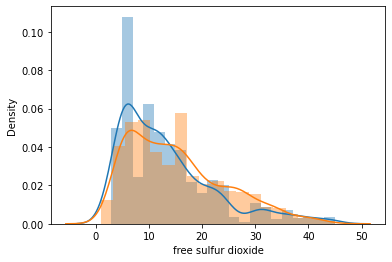

In [58]:
good=dff_new[dff_new['classify']==1]
bad=dff_new[dff_new['classify']==0]
sn.distplot(good['free sulfur dioxide'],label='1')
sn.distplot(bad['free sulfur dioxide'],label='0')

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

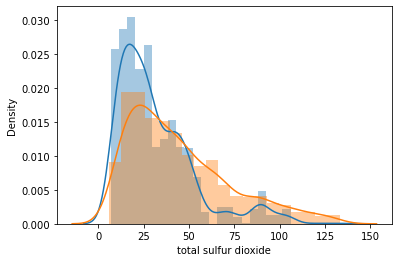

In [59]:
good=dff_new[dff_new['classify']==1]
bad=dff_new[dff_new['classify']==0]
sn.distplot(good['total sulfur dioxide'],label='1')
sn.distplot(bad['total sulfur dioxide'],label='0')

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

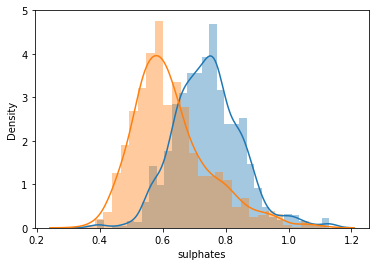

In [60]:
good=dff_new[dff_new['classify']==1]
bad=dff_new[dff_new['classify']==0]
sn.distplot(good['sulphates'],label='1')
sn.distplot(bad['sulphates'],label='0')

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

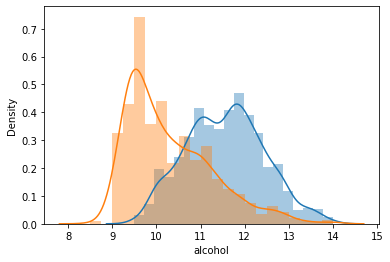

In [61]:
good=dff_new[dff_new['classify']==1]
bad=dff_new[dff_new['classify']==0]
sn.distplot(good['alcohol'],label='1')
sn.distplot(bad['alcohol'],label='0')

### apply feature scaling

In [62]:
sc=StandardScaler()
sc.fit(dff_new.drop(['classify'],axis=1))
fx=sc.transform(dff_new.drop(['classify'],axis=1))
x=pd.DataFrame(fx,columns=dff_new.drop(['classify'],axis=1).columns)

In [63]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,-0.630206,1.484026,-1.634254,-0.602504,-0.081237,-0.359322,-0.154550,-0.988081,-1.376374
1,-0.395796,2.634101,-1.634254,0.182806,1.093462,1.184101,1.133025,-0.053251,-1.019866
2,-0.395796,1.867384,-1.422848,-0.153755,0.773090,0.081656,0.625798,-0.286958,-1.019866
3,1.596684,-1.199480,1.325425,-0.602504,-0.134633,0.302145,0.859903,-0.832276,-1.019866
4,-0.630206,1.484026,-1.634254,-0.602504,-0.081237,-0.359322,-0.154550,-0.988081,-1.376374
...,...,...,...,...,...,...,...,...,...
2549,0.599663,-1.018875,0.794799,1.075075,-0.299091,3.152333,1.240713,1.325104,-0.171373
2550,0.134203,0.309709,-0.469530,-0.488906,-0.310380,-1.167320,-0.843776,1.110880,-0.366080
2551,-0.043675,-1.389962,0.427103,-0.489670,-1.945306,-1.130716,-1.090968,0.178997,1.385796
2552,-0.639063,-0.767674,0.396747,-0.790510,0.087454,1.690497,2.577205,0.149851,0.116017


### check for biasing in data

In [64]:
print(x.skew())

fixed acidity           0.553034
volatile acidity        0.638726
citric acid            -0.018850
residual sugar          2.214569
chlorides               1.310440
free sulfur dioxide     1.039652
total sulfur dioxide    1.279065
sulphates               0.356745
alcohol                 0.231013
dtype: float64


In [65]:
print(len(x.skew().loc[x.skew()>0.55]))# Number of features having skewness more than 0.55 

6


### try to remove biasing

In [66]:
#Lets treat above skewness
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [67]:
#lets again check the skewness
print(x.skew())
print()
print(len(x.skew().loc[x.skew()>0.55]))# Number of features having skewness more than 0.55 

fixed acidity           0.282852
volatile acidity        0.242218
citric acid            -0.018850
residual sugar          0.846377
chlorides               0.237284
free sulfur dioxide     0.421648
total sulfur dioxide    0.499655
sulphates               0.356745
alcohol                 0.231013
dtype: float64

1


### check if columns can be further reduced

In [68]:
for i in range(2,10):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.5043079617714399
3 0.6750923822053787
4 0.770934404974855
5 0.8556036717922487
6 0.9069210606730341
7 0.9530807009081215
8 0.9786826759527001
9 1.0


### my personal prefernce to use n component value having data retention more than 95%
### i shall use 7

In [69]:
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(x)

In [70]:
principalComponents

array([[-2.36788743e+00, -1.93219110e-01, -1.45541576e+00, ...,
         3.33495962e-01, -5.22930507e-01,  1.28486471e-01],
       [-2.57939374e+00, -7.94567517e-01,  1.20640583e+00, ...,
         1.06795031e+00,  1.19281461e-02,  3.12271778e-01],
       [-2.44572401e+00, -6.39084171e-01,  5.31550535e-01, ...,
         8.55026674e-01,  3.46109582e-01, -2.10754787e-01],
       ...,
       [ 1.42501257e+00,  1.67413807e+00, -1.11044257e+00, ...,
        -6.48318370e-01,  1.03528504e-01,  1.97887679e-03],
       [-3.69291862e-01,  4.02033675e-01,  1.94863535e+00, ...,
        -5.02556049e-01,  1.19736172e+00,  7.04093883e-02],
       [ 9.05795869e-01,  1.18146419e+00, -1.07774627e+00, ...,
        -1.11985353e-01,  3.77566198e-02, -9.32612206e-01]])

In [71]:
y=dff_new['classify'].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### code to find best random state for train test split

In [72]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,stratify=y,shuffle=True)
        model.fit(x_train,y_train)
        tmp=roc_auc_score(y_test,model.predict(x_test))
        #print(i,tmp)
        if tmp>score:
            score=tmp
            random=i
    print("maximum roc_auc_score is at random state :",random," and it is :",score)

### code to find best classifier model among all

In [73]:
models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),RidgeClassifier(),
        BaggingClassifier(),GradientBoostingClassifier(),Lasso(),ElasticNet(),LassoLars(),BayesianRidge(),SGDClassifier()]

In [74]:
best_model=0
best_score=0
score=0
for i in models:
    scores=cross_val_score(i,principalComponents,y,cv=5,scoring='roc_auc')
    score=np.mean(scores)
    if score>best_score:
        best_score=score
        best_model=i
print(best_model)
print(best_score)
print(np.std(scores))

RandomForestClassifier()
0.9603781341128144
0.08446294681332159


### finetuning model using hyper parameter

In [75]:
parameters={"n_estimators":[10,100,500],'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2']}
clf = GridSearchCV(RandomForestClassifier(), parameters, cv=5,scoring="roc_auc")
clf.fit(principalComponents,y)
clf.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 500}

### find best random state

In [76]:
besttrain(RandomForestClassifier(n_estimators=500,criterion='gini',max_features='log2'),principalComponents,y)

maximum roc_auc_score is at random state : 55  and it is : 0.9484112378849221


### finalize model train and fitting

In [77]:
x_train, x_test, y_train, y_test = train_test_split(principalComponents, y,random_state = 55,test_size=0.20,stratify=y)
rf_clf=RandomForestClassifier(n_estimators=500,criterion='gini',max_features='sqrt')
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

### find all metrics required to evaluate the model

In [78]:
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))
scores=cross_val_score(i,principalComponents,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[225  22]
 [  7 257]]
f1 score is :  0.9465930018416207
classification report 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       247
           1       0.92      0.97      0.95       264

    accuracy                           0.94       511
   macro avg       0.95      0.94      0.94       511
weighted avg       0.94      0.94      0.94       511

AUC ROC Score:  0.9422080112869587
CV mean 0.8604926250700344
std: 0.035049291714766034


### roc curve of model

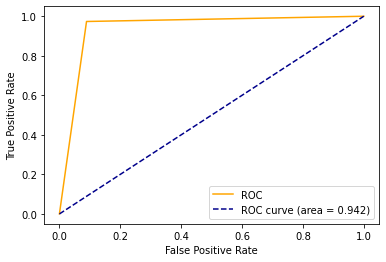

In [81]:
fpr, tpr, threshold = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### save model

In [82]:
joblib.dump(rf_clf, 'wine_datset_random_forest.pkl')

['wine_datset_random_forest.pkl']